In [1]:
pip install --upgrade pandas-gbq 'google-cloud-bigquery[bqstorage,pandas]'

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 195 kB 19.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 40.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 55.0 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 4.4 MB/s  eta 0:00:01
     |████████████████████████████████| 75 kB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 4.6 MB/s  eta 0:00:01
     |████████████████████████████████| 125 kB 69.6 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 70.6 MB/s eta 0:00:

ERROR: tensorflow 2.4.2 has requirement flatbuffers~=1.12.0, but you'll have flatbuffers 20210226132247 which is incompatible.
ERROR: tensorflow 2.4.2 has requirement grpcio~=1.32.0, but you'll have grpcio 1.39.0 which is incompatible.
ERROR: tensorflow 2.4.2 has requirement keras-preprocessing~=1.1.2, but you'll have keras-preprocessing 1.1.0 which is incompatible.
ERROR: tensorflow 2.4.2 has requirement opt-einsum~=3.3.0, but you'll have opt-einsum 3.1.0 which is incompatible.
ERROR: google-api-core 1.31.0 has requirement google-auth<2.0dev,>=1.25.0, but you'll have google-auth 1.23.0 which is incompatible.
ERROR: google-cloud-core 1.7.1 has requirement google-auth<2.0dev,>=1.24.0, but you'll have google-auth 1.23.0 which is incompatible.
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.11.2
    Uninstalling protobuf-3.11.2:
      Successfully uninstalled protobuf-3.11.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.31.0
    Unin

In [2]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib as mpl

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-OpenCE

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    geographiclib-1.52         |     pyhd8ed1ab_0          35 KB  conda-forge
    geopy-2.2.0                |     pyhd8ed1ab_0          67 KB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         247 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.52-pyhd8ed1ab_0
  geopy              conda-forge/noarch::geopy-2.2.0-pyhd8ed1ab_0
  python_abi         conda-forge/linux-64::python_abi-3.7-2_cp37m

The following p

In [3]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

## 1. Download Dataset from Canada


In [4]:
source = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
soup = BeautifulSoup(source, 'lxml')

## 2. Transformation of the Dataset into pandas dataframe

In [5]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [6]:
df.shape

(103, 3)

## 3. Include latitude and the longitude for each neighborhood in Pandas Dataframe

using geocoder.google the program was not updating I have decided to work on the csv file (https://cocl.us/Geospatial_data)
have first imported and then red the csv file and after I have performed a left join between the two tables

In [7]:
coordinates_df = pd.read_csv("https://cocl.us/Geospatial_data")
coordinates_df.rename(columns={"Postal Code": "PostalCode"}, inplace = True)
coordinates_df.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [8]:
df_merged=df.merge(coordinates_df, on='PostalCode', how='left')
df_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [9]:
toronto_data = df_merged[df_merged['Borough'].str.contains("Tor")]
toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


## 4. Download Dataset from NY and Transform it into a Pandas dataframe

In [10]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [11]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [12]:
neighborhoods_data = newyork_data['features']
neighborhoods_data

[{'type': 'Feature',
  'id': 'nyu_2451_34572.1',
  'geometry': {'type': 'Point',
   'coordinates': [-73.84720052054902, 40.89470517661]},
  'geometry_name': 'geom',
  'properties': {'name': 'Wakefield',
   'stacked': 1,
   'annoline1': 'Wakefield',
   'annoline2': None,
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.84720052054902,
    40.89470517661,
    -73.84720052054902,
    40.89470517661]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.2',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82993910812398, 40.87429419303012]},
  'geometry_name': 'geom',
  'properties': {'name': 'Co-op City',
   'stacked': 2,
   'annoline1': 'Co-op',
   'annoline2': 'City',
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.82993910812398,
    40.87429419303012,
    -73.82993910812398,
    40.87429419303012]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.3',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82780644716412, 

In [13]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
NY_data = pd.DataFrame(columns=column_names)

In [14]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    NY_data = NY_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [15]:
NY_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [16]:
NY_data.shape

(306, 4)

In [17]:
NY_data = NY_data[NY_data['Borough'] == 'Manhattan'].reset_index(drop=True)

NY_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [18]:
NY_data.shape

(40, 4)

In [19]:
toronto_data.shape

(39, 5)

## 5. Explore and cluster the neighborhoods in Toronto.

I have decided to work with only boroughs that contain the word Toronto

In [20]:
toronto_data = df_merged[df_merged['Borough'].str.contains("Tor")]
toronto_data=toronto_data.drop(columns =['PostalCode'])
toronto_data.head()

,Borough,Neighborhood,Latitude,Longitude
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
9,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,Downtown Toronto,St. James Town,43.651494,-79.375418
19,East Toronto,The Beaches,43.676357,-79.293031
20,Downtown Toronto,Berczy Park,43.644771,-79.373306


## 6. Merged the two Dataframe together

In [21]:
toronto_data['City']= "Toronto"
toronto_data.head()

,Borough,Neighborhood,Latitude,Longitude,City
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Toronto
9,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,Toronto
15,Downtown Toronto,St. James Town,43.651494,-79.375418,Toronto
19,East Toronto,The Beaches,43.676357,-79.293031,Toronto
20,Downtown Toronto,Berczy Park,43.644771,-79.373306,Toronto


In [22]:
toronto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 2 to 100
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       39 non-null     object 
 1   Neighborhood  39 non-null     object 
 2   Latitude      39 non-null     float64
 3   Longitude     39 non-null     float64
 4   City          39 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.8+ KB


In [23]:
NY_data['City']= "NewYork"
NY_data.head()

,Borough,Neighborhood,Latitude,Longitude,City
0,Manhattan,Marble Hill,40.876551,-73.910660,NewYork
1,Manhattan,Chinatown,40.715618,-73.994279,NewYork
2,Manhattan,Washington Heights,40.851903,-73.936900,NewYork
3,Manhattan,Inwood,40.867684,-73.921210,NewYork
4,Manhattan,Hamilton Heights,40.823604,-73.949688,NewYork


In [24]:
NY_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       40 non-null     object 
 1   Neighborhood  40 non-null     object 
 2   Latitude      40 non-null     float64
 3   Longitude     40 non-null     float64
 4   City          40 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.7+ KB


In [25]:
TorNY_data = pd.concat([toronto_data, NY_data], axis=0)

In [26]:
TorNY_data.shape

(79, 5)

In [27]:
TorNY_data.head()

,Borough,Neighborhood,Latitude,Longitude,City
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Toronto
9,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,Toronto
15,Downtown Toronto,St. James Town,43.651494,-79.375418,Toronto
19,East Toronto,The Beaches,43.676357,-79.293031,Toronto
20,Downtown Toronto,Berczy Park,43.644771,-79.373306,Toronto


## 7. Explore using Folium.Map the neighborhood of New York and Canada

### Use geopy library to get the latitude and longitude values of Toronto City.

In [28]:
address_To = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address_To)
latitude_To = location.latitude
longitude_To = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_To, longitude_To))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


### Use geopy library to get the latitude and longitude values of NY City.

In [29]:
address_NY = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address_NY)
latitude_NY = location.latitude
longitude_NY = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude_NY, longitude_NY))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


### Create a map of Toronto and NY with neighborhoods superimposed on top.

In [30]:
# create map of Toronto borough using latitude and longitude values
map_newtoronto = folium.Map(location=[latitude_To, longitude_To], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(TorNY_data['Latitude'], TorNY_data['Longitude'], TorNY_data['Borough'], TorNY_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newtoronto)  
    
map_newtoronto

In [31]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude_NY, longitude_NY], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(TorNY_data['Latitude'], TorNY_data['Longitude'], TorNY_data['Borough'], TorNY_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## 8. Acquisition of top 100 venues from Foursquare that are in Toronto and New York within a radius of 500 meters.

#### Define Foursquare Credentials and Version

In [32]:
CLIENT_ID = 'QOB3ZMDA5S3GJXZTHWBKAJIBEUSGPZAU20IFRXEISA3ANAII' # your Foursquare ID client ID
CLIENT_SECRET = 'RQAC0LCWXD4JHTM4PIF0QGUB1GGNDRVN2P5GJAR4QNZD14KW' # your Foursquare Secret client secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QOB3ZMDA5S3GJXZTHWBKAJIBEUSGPZAU20IFRXEISA3ANAII
CLIENT_SECRET:RQAC0LCWXD4JHTM4PIF0QGUB1GGNDRVN2P5GJAR4QNZD14KW


#### Now, let's get the top 100 venues that are in Toronto and New York within a radius of 500 meters.

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
torontoNY_venues = getNearbyVenues(names=TorNY_data['Neighborhood'],
                                   latitudes=TorNY_data['Latitude'],
                                   longitudes=TorNY_data['Longitude']
                                  )


Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Enclave of M5E
St. James Town, Cabbagetown
First Canadi

In [35]:
print(torontoNY_venues.shape)
torontoNY_venues.head()

(4859, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


In [36]:
torontoNY_plot = TorNY_data.join(torontoNY_venues.set_index('Neighborhood'), on='Neighborhood')
torontoNY_plot.head()

,Borough,Neighborhood,Latitude,Longitude,City,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,Toronto,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
2,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,Toronto,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,Toronto,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
2,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,Toronto,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
2,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,Toronto,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


In [37]:
NY_plt = torontoNY_plot[torontoNY_plot['City'] == 'NewYork']
#.reset_index(drop=True)
Tor_plt = torontoNY_plot[torontoNY_plot['City'] == 'Toronto']
Tor_plt.head()

,Borough,Neighborhood,Latitude,Longitude,City,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,Toronto,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
2,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,Toronto,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,Toronto,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
2,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,Toronto,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
2,Downtown Toronto,"Regent Park, Harbourfront",43.65426,-79.360636,Toronto,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


In [38]:
ParetoData1=NY_plt.groupby('Neighborhood').count()
ParetoData1.reset_index(inplace=True)
ParetoData1.head()

,Neighborhood,Borough,Latitude,Longitude,City,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Battery Park City,94,94,94,94,94,94,94,94,94,94
1,Carnegie Hill,90,90,90,90,90,90,90,90,90,90
2,Central Harlem,45,45,45,45,45,45,45,45,45,45
3,Chelsea,100,100,100,100,100,100,100,100,100,100
4,Chinatown,100,100,100,100,100,100,100,100,100,100


In [39]:
ParetoData2=Tor_plt.groupby('Neighborhood').count()
ParetoData2.reset_index(inplace=True)
ParetoData2.head()

,Neighborhood,Borough,Latitude,Longitude,City,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berczy Park,57,57,57,57,57,57,57,57,57,57
1,"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23,23,23,23,23
2,"CN Tower, King and Spadina, Railway Lands, Har...",14,14,14,14,14,14,14,14,14,14
3,Central Bay Street,69,69,69,69,69,69,69,69,69,69
4,Christie,16,16,16,16,16,16,16,16,16,16


[]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


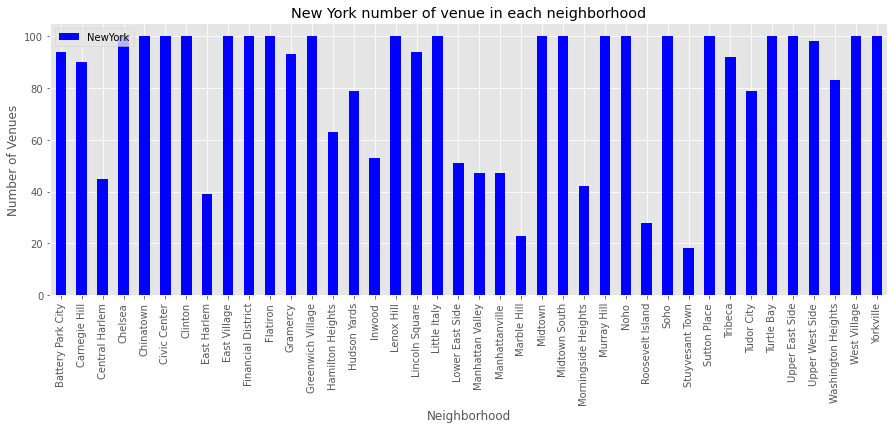

In [40]:
plt.style.use('ggplot')
ParetoData1.plot(x="Neighborhood", y="Venue", kind="bar",color= "blue", label = 'NewYork', figsize=(15,5))
plt.title('New York number of venue in each neighborhood')
plt.rcParams.update({'font.sans-serif':'Helvetica'})

plt.ylabel('Number of Venues')
plt.plot()

Text(0, 0.5, 'Number of Venues')

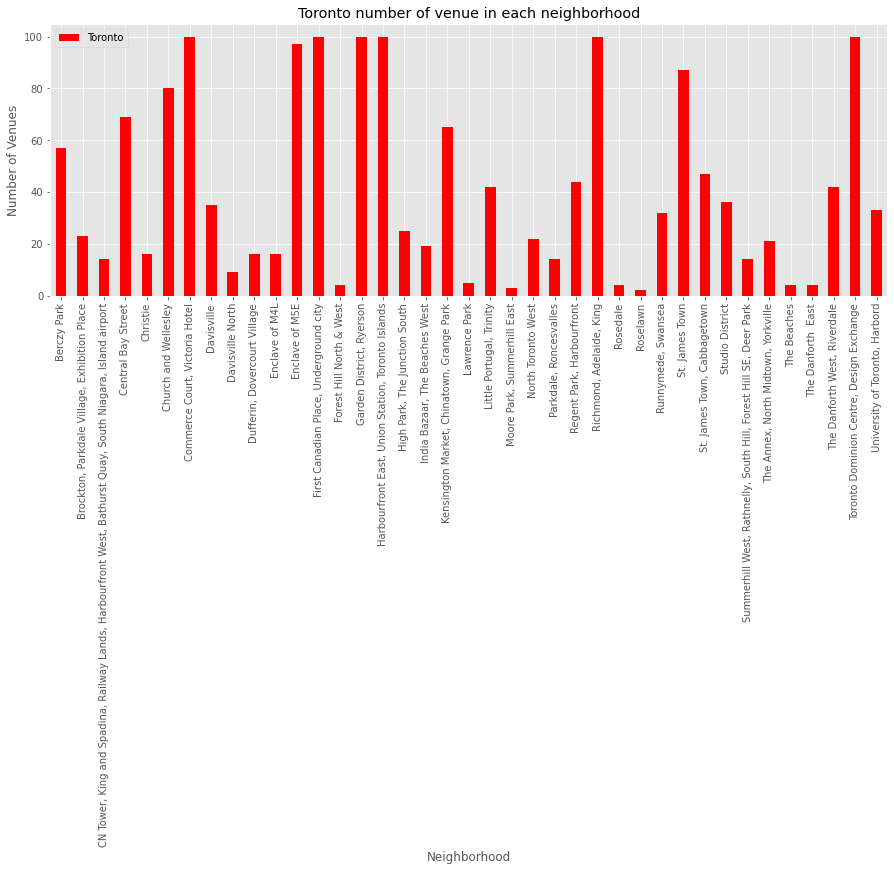

In [41]:
ParetoData2.plot(x="Neighborhood", y="Venue", kind="bar", color= "red",label = 'Toronto', figsize=(15,5))
plt.title('Toronto number of venue in each neighborhood')

plt.ylabel('Number of Venues')

In [42]:
ParetoData2a=torontoNY_plot.groupby(['City','Neighborhood','Venue Category']).count()
ParetoData2a.reset_index(inplace=True)
ParetoData2a.head()
labelsNY= ParetoData2a[ParetoData2a['City'] == 'NewYork']['Venue Category'].unique()
labelsTor= ParetoData2a[ParetoData2a['City'] == 'Toronto']['Venue Category'].unique()

In [43]:
list(labelsNY)

['American Restaurant',
 'Athletics & Sports',
 'Auditorium',
 'BBQ Joint',
 'Bakery',
 'Bar',
 'Beer Garden',
 'Bistro',
 'Boat or Ferry',
 'Boutique',
 'Burger Joint',
 'Burrito Place',
 'Chinese Restaurant',
 'Clothing Store',
 'Coffee Shop',
 'Cooking School',
 'Cosmetics Shop',
 'Department Store',
 'Dessert Shop',
 'Electronics Store',
 'Exhibit',
 'Food Court',
 'Garden',
 'Gift Shop',
 'Gourmet Shop',
 'Grocery Store',
 'Gym',
 'Hotel',
 'Ice Cream Shop',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Juice Bar',
 'Lingerie Store',
 'Mediterranean Restaurant',
 'Memorial Site',
 "Men's Store",
 'Mexican Restaurant',
 'Movie Theater',
 'Park',
 'Performing Arts Venue',
 'Pet Store',
 'Pizza Place',
 'Playground',
 'Plaza',
 'Pub',
 'Salad Place',
 'Sandwich Place',
 'Scenic Lookout',
 'Seafood Restaurant',
 'Shopping Mall',
 'Steakhouse',
 'Sushi Restaurant',
 'Tree',
 'Wine Shop',
 "Women's Store",
 'Argentinian Restaurant',
 'Art Museum',
 'Bagel Shop',
 'Bank',
 'Bookstore'

In [44]:
ParetoData2a[ParetoData2a['City'] == 'NewYork'].groupby('Venue Category').count()['Venue'].sort_values(ascending = False).keys()

Index(['Coffee Shop', 'Italian Restaurant', 'Pizza Place',
       'American Restaurant', 'Café', 'Bakery', 'Park', 'Gym', 'Bar',
       'Mexican Restaurant',
       ...
       'Coworking Space', 'Creperie', 'Cultural Center',
       'Portuguese Restaurant', 'Post Office', 'Czech Restaurant',
       'Stationery Store', 'Daycare', 'Stables', 'Opera House'],
      dtype='object', name='Venue Category', length=334)

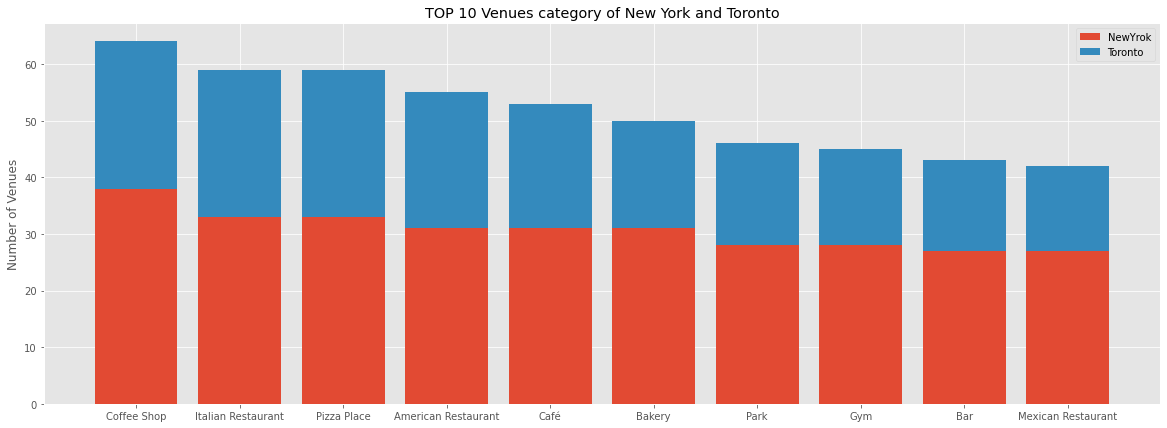

In [48]:
 fig, ax = plt.subplots(figsize= (20, 7))
ax.bar(ParetoData2a[ParetoData2a['City'] == 'NewYork'].groupby('Venue Category').count()['Venue'].sort_values(ascending = False).keys()[:10], ParetoData2a[ParetoData2a['City'] == 'NewYork'].groupby('Venue Category').count()['Venue'].sort_values(ascending = False)[:10], label='NewYrok')
ax.bar(ParetoData2a[ParetoData2a['City'] == 'NewYork'].groupby('Venue Category').count()['Venue'].sort_values(ascending = False).keys()[:10], ParetoData2a[ParetoData2a['City'] == 'Toronto'].groupby('Venue Category').count()['Venue'].sort_values(ascending = False)[:10], bottom= ParetoData2a[ParetoData2a['City'] == 'NewYork'].groupby('Venue Category').count()['Venue'].sort_values(ascending = False)[:10], label='Toronto')

ax.set_ylabel('Number of Venues')
ax.set_title('TOP 10 Venues category of New York and Toronto')
ax.legend()

plt.show()

## 8. Preparation of data for Clustering

In [49]:
torontoNY_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,94,94,94,94,94,94
Berczy Park,57,57,57,57,57,57
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",14,14,14,14,14,14
Carnegie Hill,90,90,90,90,90,90
...,...,...,...,...,...,...
Upper East Side,100,100,100,100,100,100
Upper West Side,98,98,98,98,98,98
Washington Heights,83,83,83,83,83,83


In [50]:
print('There are {} uniques categories.'.format(len(torontoNY_venues['Venue Category'].unique())))

There are 379 uniques categories.


In [51]:
# one hot encoding
torontoNY_onehot = pd.get_dummies(torontoNY_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
torontoNY_onehot['Neighborhood'] = torontoNY_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [torontoNY_onehot.columns[-1]] + list(torontoNY_onehot.columns[:-1])
torontoNY_onehot = torontoNY_onehot[fixed_columns]

torontoNY_onehot.head()

,Yoga Studio,Accessories Store,Acupuncturist,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,...,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
torontoNY_grouped = torontoNY_onehot.groupby('Neighborhood').mean().reset_index()
torontoNY_grouped

,Neighborhood,Yoga Studio,Accessories Store,Acupuncturist,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,...,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Battery Park City,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000000,0.021277,0.0,0.021277
1,Berczy Park,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.0,0.0,0.0,0.0,0.071429,0.071429,0.142857,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
4,Carnegie Hill,0.033333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.011111,0.0,0.0,0.0,0.011111,0.044444,0.0,0.011111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Upper East Side,0.030000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000000,0.020000,0.0,0.010000
75,Upper West Side,0.010204,0.010204,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.010204,0.0,0.0,0.0,0.030612,0.010204,0.0,0.000000
76,Washington Heights,0.000000,0.012048,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.012048,0.00,0.000000,0.0,0.0,0.0,0.012048,0.024096,0.0,0.012048
77,West Village,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.030000,0.010000,0.0,0.000000


In [53]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [54]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = torontoNY_grouped['Neighborhood']

for ind in np.arange(torontoNY_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(torontoNY_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Clothing Store,Hotel,Playground,Boat or Ferry,Gym,Memorial Site,Burger Joint,Shopping Mall
1,Berczy Park,Coffee Shop,Bakery,Cocktail Bar,Pharmacy,Seafood Restaurant,Farmers Market,Beer Bar,Cheese Shop,Restaurant,Nightclub
2,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Coffee Shop,Restaurant,Bar,Bakery,Office,Climbing Gym,Grocery Store,Gym
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Terminal,Airport Lounge,Bar,Airport Food Court,Coffee Shop,Rental Car Location,Boat or Ferry,Harbor / Marina,Airport Service,Airport
4,Carnegie Hill,Coffee Shop,Café,Wine Shop,Yoga Studio,Gym / Fitness Center,Gym,Bookstore,French Restaurant,Cosmetics Shop,Pub


## 9. Perform clustering using K-means

In [57]:
#neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop('Cluster Labels', 1)

In [58]:
# set number of clusters
kclusters = 10

toronto_grouped_clustering = torontoNY_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 1, 9, 1, 1, 1, 3, 3, 3, 9], dtype=int32)

In [59]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

torontoNY_merged = TorNY_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
torontoNY_merged = torontoNY_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

torontoNY_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Toronto,1,Coffee Shop,Park,Bakery,Pub,Theater,Café,Breakfast Spot,Electronics Store,Bank,French Restaurant
9,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,Toronto,1,Coffee Shop,Clothing Store,Hotel,Café,Cosmetics Shop,Japanese Restaurant,Bubble Tea Shop,Pizza Place,Italian Restaurant,Diner
15,Downtown Toronto,St. James Town,43.651494,-79.375418,Toronto,1,Coffee Shop,Café,Bakery,Cocktail Bar,Clothing Store,Cosmetics Shop,Restaurant,Moroccan Restaurant,American Restaurant,Lingerie Store
19,East Toronto,The Beaches,43.676357,-79.293031,Toronto,6,Pub,Health Food Store,Trail,Women's Store,English Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop
20,Downtown Toronto,Berczy Park,43.644771,-79.373306,Toronto,1,Coffee Shop,Bakery,Cocktail Bar,Pharmacy,Seafood Restaurant,Farmers Market,Beer Bar,Cheese Shop,Restaurant,Nightclub


In [109]:
%matplotlib inline 
# create map
map_clusters1 = folium.Map(location=[latitude_To, longitude_To], zoom_start=12)
map_clusters2 = folium.Map(location=[latitude_NY, longitude_NY], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(torontoNY_merged['Latitude'], torontoNY_merged['Longitude'], torontoNY_merged['Neighborhood'], torontoNY_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters1)
markers_colors = []
for lat, lon, poi, cluster in zip(torontoNY_merged['Latitude'], torontoNY_merged['Longitude'],torontoNY_merged['Neighborhood'], torontoNY_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters1

In [110]:
map_clusters2

## 5. Examine Clusters


Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.


#### Cluster 0


In [111]:
torontoNY_merged.loc[torontoNY_merged['Cluster Labels'] == 0, torontoNY_merged.columns[[1, 4] + list(range(5, torontoNY_merged.shape[1]))]]

,Neighborhood,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,The Danforth East,Toronto,0,Convenience Store,Intersection,Rental Car Location,Park,Fish Market,English Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant


#### Cluster 1


In [112]:
Cluster1=torontoNY_merged.loc[torontoNY_merged['Cluster Labels'] == 1, torontoNY_merged.columns[[1, 4] + list(range(5, torontoNY_merged.shape[1]))]]
Cluster1

,Neighborhood,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Regent Park, Harbourfront",Toronto,1,Coffee Shop,Park,Bakery,Pub,Theater,Café,Breakfast Spot,Electronics Store,Bank,French Restaurant
9,"Garden District, Ryerson",Toronto,1,Coffee Shop,Clothing Store,Hotel,Café,Cosmetics Shop,Japanese Restaurant,Bubble Tea Shop,Pizza Place,Italian Restaurant,Diner
15,St. James Town,Toronto,1,Coffee Shop,Café,Bakery,Cocktail Bar,Clothing Store,Cosmetics Shop,Restaurant,Moroccan Restaurant,American Restaurant,Lingerie Store
20,Berczy Park,Toronto,1,Coffee Shop,Bakery,Cocktail Bar,Pharmacy,Seafood Restaurant,Farmers Market,Beer Bar,Cheese Shop,Restaurant,Nightclub
24,Central Bay Street,Toronto,1,Coffee Shop,Café,Sandwich Place,Italian Restaurant,Japanese Restaurant,Burger Joint,Bubble Tea Shop,Salad Place,Restaurant,Deli / Bodega
30,"Richmond, Adelaide, King",Toronto,1,Coffee Shop,Café,Clothing Store,Thai Restaurant,Hotel,Restaurant,Bar,Gym,American Restaurant,Salad Place
36,"Harbourfront East, Union Station, Toronto Islands",Toronto,1,Coffee Shop,Aquarium,Hotel,Café,Brewery,Scenic Lookout,Restaurant,Fried Chicken Joint,Pizza Place,Sporting Goods Shop
41,"The Danforth West, Riverdale",Toronto,1,Greek Restaurant,Italian Restaurant,Coffee Shop,Ice Cream Shop,Furniture / Home Store,Café,Bakery,Liquor Store,Lounge,Sushi Restaurant
42,"Toronto Dominion Centre, Design Exchange",Toronto,1,Coffee Shop,Hotel,Café,Restaurant,Salad Place,Bakery,Japanese Restaurant,Seafood Restaurant,Italian Restaurant,Lounge
48,"Commerce Court, Victoria Hotel",Toronto,1,Coffee Shop,Restaurant,Café,Hotel,Gym,Seafood Restaurant,Deli / Bodega,Japanese Restaurant,American Restaurant,Bakery


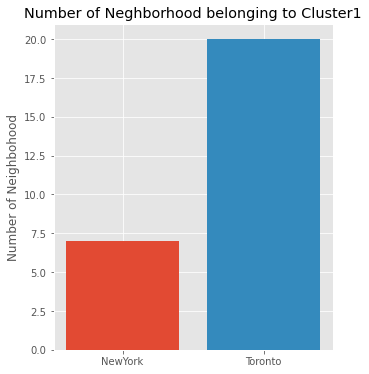

In [113]:
fig, ax = plt.subplots(figsize= (5, 6))
ax.bar(Cluster1[Cluster1['City'] == 'NewYork']['City'], Cluster1[Cluster1['City'] == 'NewYork'].count()['City'] , label= None)
ax.bar(Cluster1[Cluster1['City'] == 'Toronto']['City'], Cluster1[Cluster1['City'] == 'Toronto'].count()['City'], label= None)

ax.set_ylabel('Number of Neighbohood')
ax.set_title('Number of Neghborhood belonging to Cluster1')
#ax.legend()

plt.show()

#### Cluster 2


In [114]:
torontoNY_merged.loc[torontoNY_merged['Cluster Labels'] == 2, torontoNY_merged.columns[[1, 4] + list(range(5, torontoNY_merged.shape[1]))]]

,Neighborhood,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,"Moore Park, Summerhill East",Toronto,2,Park,Tennis Court,Summer Camp,Escape Room,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store


#### Cluster 3


In [115]:
Cluster3=torontoNY_merged.loc[torontoNY_merged['Cluster Labels'] == 3, torontoNY_merged.columns[[1, 4] + list(range(5, torontoNY_merged.shape[1]))]]
Cluster3

,Neighborhood,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
47,"India Bazaar, The Beaches West",Toronto,3,Pizza Place,Restaurant,Fish & Chips Shop,Movie Theater,Food & Drink Shop,Board Shop,Steakhouse,Burrito Place,Sushi Restaurant,Liquor Store
67,Davisville North,Toronto,3,Park,Gym / Fitness Center,Department Store,Sandwich Place,Dance Studio,Pizza Place,Breakfast Spot,Hotel,Food & Drink Shop,Drugstore
100,Enclave of M4L,Toronto,3,Yoga Studio,Burrito Place,Auto Workshop,Park,Gym / Fitness Center,Skate Park,Garden Center,Garden,Butcher,Restaurant
1,Chinatown,NewYork,3,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Salon / Barbershop,Hotpot Restaurant,Optical Shop,Dessert Shop,Spa,Malay Restaurant
6,Central Harlem,NewYork,3,African Restaurant,Bar,Gym / Fitness Center,Chinese Restaurant,Seafood Restaurant,French Restaurant,Public Art,American Restaurant,Art Gallery,Ethiopian Restaurant
8,Upper East Side,NewYork,3,Italian Restaurant,Exhibit,Juice Bar,Coffee Shop,Gym / Fitness Center,Bakery,Hotel,Spa,Cosmetics Shop,Yoga Studio
10,Lenox Hill,NewYork,3,Italian Restaurant,Sushi Restaurant,Coffee Shop,Pizza Place,Cocktail Bar,Gym,Gym / Fitness Center,Burger Joint,Café,Steakhouse
12,Upper West Side,NewYork,3,Italian Restaurant,Café,Bakery,Bar,Bagel Shop,Coffee Shop,Wine Bar,Breakfast Spot,Pub,Sports Bar
13,Lincoln Square,NewYork,3,Plaza,Theater,Concert Hall,Performing Arts Venue,Café,Park,Italian Restaurant,Gym / Fitness Center,Food Truck,Indie Movie Theater
14,Clinton,NewYork,3,Italian Restaurant,Theater,Gym / Fitness Center,Coffee Shop,Sandwich Place,American Restaurant,Gym,Pizza Place,Hotel,Cocktail Bar


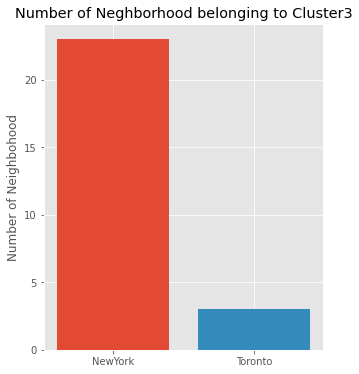

In [116]:
fig, ax = plt.subplots(figsize= (5, 6))
ax.bar(Cluster3[Cluster3['City'] == 'NewYork']['City'], Cluster3[Cluster3['City'] == 'NewYork'].count()['City'] , label= None)
ax.bar(Cluster3[Cluster3['City'] == 'Toronto']['City'], Cluster3[Cluster3['City'] == 'Toronto'].count()['City'], label= None)

ax.set_ylabel('Number of Neighbohood')
ax.set_title('Number of Neghborhood belonging to Cluster3')
#ax.legend()

plt.show()

#### Cluster 4


In [117]:
torontoNY_merged.loc[torontoNY_merged['Cluster Labels'] == 4, torontoNY_merged.columns[[1, 4] + list(range(5, torontoNY_merged.shape[1]))]]

,Neighborhood,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
91,Rosedale,Toronto,4,Park,Playground,Trail,Women's Store,English Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop


#### Cluster 5

In [118]:
torontoNY_merged.loc[torontoNY_merged['Cluster Labels'] == 5, torontoNY_merged.columns[[1, 4] + list(range(5, torontoNY_merged.shape[1]))]]

,Neighborhood,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
62,Roselawn,Toronto,5,Garden,Home Service,Women's Store,Event Space,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant


#### Cluster 6

In [119]:
torontoNY_merged.loc[torontoNY_merged['Cluster Labels'] == 6, torontoNY_merged.columns[[1, 4] + list(range(5, torontoNY_merged.shape[1]))]]

,Neighborhood,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,The Beaches,Toronto,6,Pub,Health Food Store,Trail,Women's Store,English Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop


#### Cluster 7

In [120]:
torontoNY_merged.loc[torontoNY_merged['Cluster Labels'] == 7, torontoNY_merged.columns[[1, 4] + list(range(5, torontoNY_merged.shape[1]))]]

,Neighborhood,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
61,Lawrence Park,Toronto,7,Park,Bus Line,Lake,Swim School,Dim Sum Restaurant,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant


#### Cluster 8

In [121]:
torontoNY_merged.loc[torontoNY_merged['Cluster Labels'] == 8, torontoNY_merged.columns[[1, 4] + list(range(5, torontoNY_merged.shape[1]))]]

,Neighborhood,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,Forest Hill North & West,Toronto,8,Trail,Sushi Restaurant,Jewelry Store,Bus Line,Women's Store,Escape Room,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant


#### Cluster 9

In [122]:
Cluster9= torontoNY_merged.loc[torontoNY_merged['Cluster Labels'] == 9, torontoNY_merged.columns[[1, 4] + list(range(5, torontoNY_merged.shape[1]))]]
Cluster9

,Neighborhood,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Christie,Toronto,9,Grocery Store,Café,Park,Nightclub,Candy Store,Athletics & Sports,Coffee Shop,Restaurant,Baby Store,Italian Restaurant
31,"Dufferin, Dovercourt Village",Toronto,9,Pharmacy,Bakery,Brazilian Restaurant,Bar,Grocery Store,Gym / Fitness Center,Park,Café,Supermarket,Furniture / Home Store
37,"Little Portugal, Trinity",Toronto,9,Bar,Asian Restaurant,Diner,Vietnamese Restaurant,Restaurant,Café,Men's Store,Bistro,Korean Restaurant,Greek Restaurant
43,"Brockton, Parkdale Village, Exhibition Place",Toronto,9,Café,Breakfast Spot,Coffee Shop,Restaurant,Bar,Bakery,Office,Climbing Gym,Grocery Store,Gym
69,"High Park, The Junction South",Toronto,9,Thai Restaurant,Café,Arts & Crafts Store,Mexican Restaurant,Grocery Store,Antique Shop,Bakery,Flea Market,Cajun / Creole Restaurant,Gastropub
74,"The Annex, North Midtown, Yorkville",Toronto,9,Sandwich Place,Café,Coffee Shop,BBQ Joint,Burger Joint,Park,Grocery Store,Donut Shop,Middle Eastern Restaurant,Pharmacy
80,"University of Toronto, Harbord",Toronto,9,Café,Sandwich Place,Bar,Bakery,Bookstore,Japanese Restaurant,Dessert Shop,Bank,Beer Bar,Noodle House
81,"Runnymede, Swansea",Toronto,9,Café,Pub,Pizza Place,Coffee Shop,Italian Restaurant,Sushi Restaurant,Indie Movie Theater,French Restaurant,Sandwich Place,Post Office
84,"Kensington Market, Chinatown, Grange Park",Toronto,9,Café,Bar,Coffee Shop,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Arts & Crafts Store,Caribbean Restaurant,Dumpling Restaurant,Grocery Store,Mexican Restaurant
2,Washington Heights,NewYork,9,Café,Bakery,Mobile Phone Shop,Bank,Grocery Store,Pizza Place,Sandwich Place,Deli / Bodega,Park,Latin American Restaurant


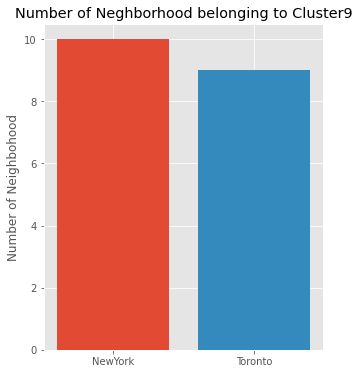

In [123]:
fig, ax = plt.subplots(figsize= (5, 6))
ax.bar(Cluster9[Cluster9['City'] == 'NewYork']['City'], Cluster9[Cluster9['City'] == 'NewYork'].count()['City'] , label= None)
ax.bar(Cluster9[Cluster9['City'] == 'Toronto']['City'], Cluster9[Cluster9['City'] == 'Toronto'].count()['City'], label= None)

ax.set_ylabel('Number of Neighbohood')
ax.set_title('Number of Neghborhood belonging to Cluster9')
#ax.legend()

plt.show()